In [3]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

In [4]:
#csv file read
read = "Resources/avocado.csv"

# Read with Pandas
avo = pd.read_csv(read)
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avo.dtypes


Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
#avo_group = avo.groupby("")
avo["year"].nunique()

phoenix = avo.loc[avo["region"]=="PhoenixTucson"]
conventional = phoenix.loc[phoenix['type']== 'conventional']

organic = phoenix.loc[phoenix['type']== 'organic']


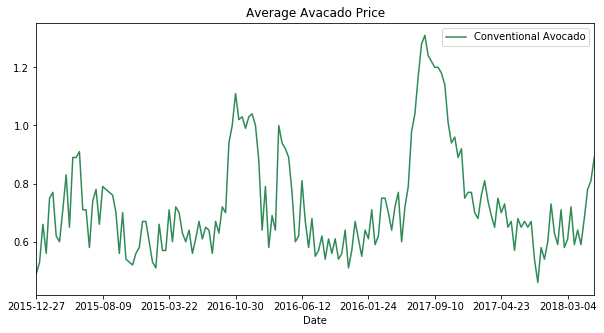

In [7]:
conventional.plot(kind='line', x='Date', y='AveragePrice', color='seagreen', figsize=(10,5), 
                  label='Conventional Avocado', title='Average Avacado Price')

In [8]:
organic.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10842,0,2015-12-27,1.72,7422.47,5038.15,906.49,0.0,1477.83,1324.33,153.50,0.0,organic,2015,PhoenixTucson
10843,1,2015-12-20,1.79,6499.82,4879.21,919.88,0.0,700.73,679.05,21.68,0.0,organic,2015,PhoenixTucson
10844,2,2015-12-13,1.72,6991.24,5065.07,1160.53,0.0,765.64,765.64,0.00,0.0,organic,2015,PhoenixTucson
10845,3,2015-12-06,1.87,5936.27,4843.94,832.33,0.0,260.00,260.00,0.00,0.0,organic,2015,PhoenixTucson
10846,4,2015-11-29,1.89,5175.81,4379.15,689.99,0.0,106.67,106.67,0.00,0.0,organic,2015,PhoenixTucson


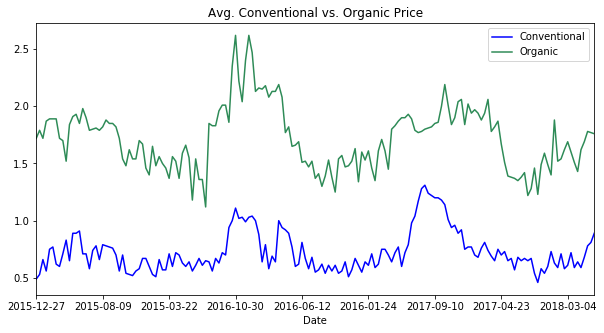

In [9]:
#phoenix['Date'] = pd.to_datetime(phoenix['Date'])


ax = plt.gca()

conventional.plot(kind='line',x='Date',y='AveragePrice', color='blue', label='Conventional',ax=ax)
organic.plot(kind='line',x='Date',y='AveragePrice', color='seagreen', label='Organic',figsize= (10,5),
             title='Avg. Conventional vs. Organic Price', ax=ax)


plt.show()

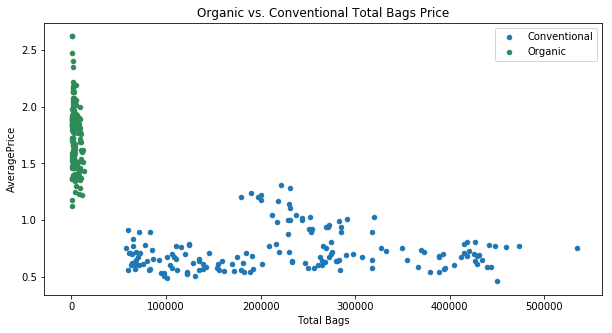

In [10]:
ax = plt.gca()

conventional.plot(kind='scatter',x='Total Bags',y='AveragePrice',label='Conventional',ax=ax)
organic.plot(kind='scatter',x='Total Bags',y='AveragePrice', color='seagreen', label='Organic',figsize= (10,5), 
             title='Organic vs. Conventional Total Bags Price', ax=ax)


plt.show()

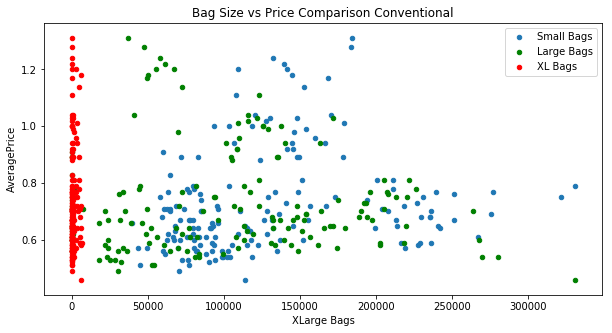

In [11]:
ax = plt.gca()

conventional.plot(kind='scatter',x='Small Bags',y='AveragePrice',label='Small Bags',ax=ax)
conventional.plot(kind='scatter',x='Large Bags',y='AveragePrice', color='green', label='Large Bags',figsize= (10,5), ax=ax)
conventional.plot(kind='scatter',x='XLarge Bags',y='AveragePrice', color='red', label='XL Bags',figsize= (10,5), 
                  title='Bag Size vs Price Comparison Conventional',ax=ax)

plt.show()

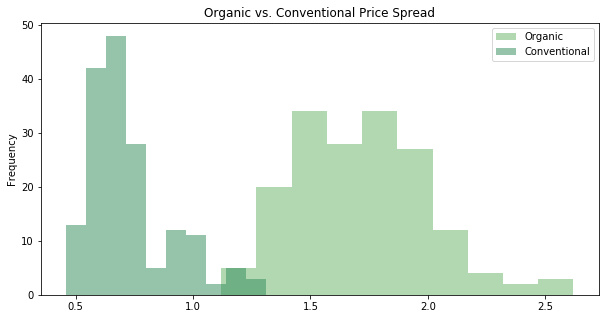

In [12]:

ax = plt.gca()

organic.plot(kind='hist',x='Total Bags',y='AveragePrice',label='Organic',color='green', alpha=0.3, ax=ax)
conventional.plot(kind='hist',x='Total Bags',y='AveragePrice', color='seagreen', label='Conventional',figsize= (10,5), 
                  title='Organic vs. Conventional Price Spread', alpha=0.5, ax=ax)

plt.show()

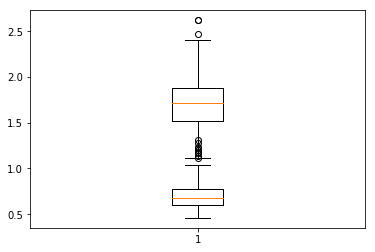

In [13]:
#organic.plot(kind='box', x='Total Bags', y='AveragePrice')
fig , ax = plt.subplots()
ax1 = ax.boxplot(organic['AveragePrice'])
ax2 = ax.boxplot(conventional['AveragePrice'])


# organic.plot(kind='box', x='Total Bags', y='AveragePrice', subplots=True)
# conventional.plot(kind='box',x='Total Bags',y='AveragePrice', color='seagreen', label='Conventional',figsize= (10,5), 
#                   title='Organic vs. Conventional Price Spread')
plt.show()



In [14]:
lol_df = conventional.groupby(['Date']).mean()
lol_df['AveragePrice'].std()

0.17802600558461254

In [15]:
xd_df = organic.groupby(['Date']).mean()
xd_df['AveragePrice'].std()

0.2755689828333419

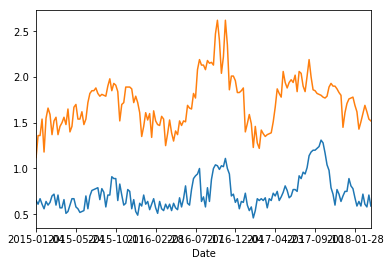

In [16]:
lol_df['AveragePrice'].plot()
xd_df['AveragePrice'].plot()

In [17]:
xd_df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,,
2015-01-04,51,1.12,17296.85,14569.66,1868.59,0.0,858.60,830.00,28.60,0.0,2015
2015-01-11,50,1.36,14035.18,11523.29,1632.63,0.0,879.26,876.68,2.58,0.0,2015
2015-01-18,49,1.36,12251.87,10248.57,1529.97,0.0,473.33,473.33,0.00,0.0,2015
2015-01-25,48,1.54,10849.40,7988.43,1728.24,0.0,1132.73,1120.00,12.73,0.0,2015
2015-02-01,47,1.18,13645.72,10810.58,2016.62,0.0,818.52,813.46,5.06,0.0,2015


In [18]:
decom = seasonal_decompose(xd_df['AveragePrice'],freq=12)

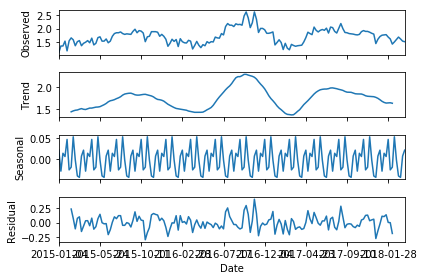

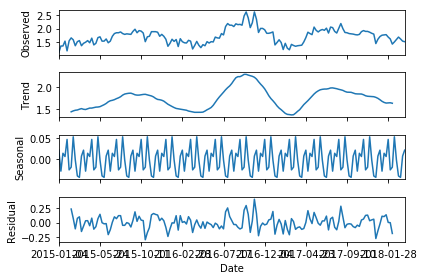

In [19]:
decom.plot()

In [21]:
model = sm.tsa.statespace.SARIMAX(xd_df['AveragePrice'],order=(0,1,0),seasonal_order=(1,1,1,12))

NameError: name 'sm' is not defined

In [22]:
res = model.fit()
print(res.summary())

NameError: name 'model' is not defined

In [23]:
xd_df['forecast'] = res.predict(start=200,end=210,dynamic=True)

NameError: name 'res' is not defined

In [24]:
xd_df.index.dtype

dtype('O')

In [26]:
decom2 = seasonal_decompose(lol_df['AveragePrice'],freq=12)

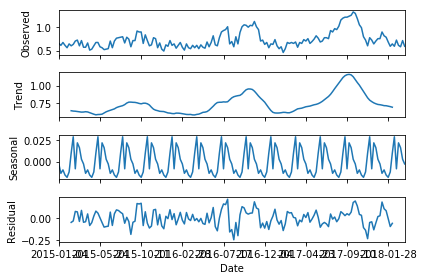

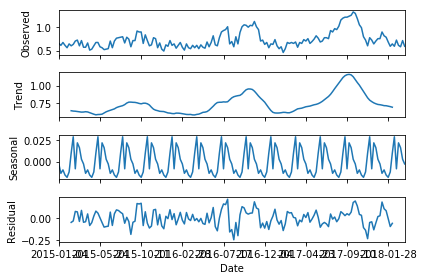

In [27]:
decom2.plot()